# Predicting Maternal Health Risk

#### Source: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/data

### The goal of this Capstone is to explore a Maternal Health Risk Dataset and train a Random Forest model to predict what level risk a pregnancy is based on the following features:

Age: Age of the mother 

SystolicBP: Systolic blood pressure

DiastolicBP: Diastolic blood pressure

BS: Blood sugar levels

BodyTemp: Body temperature

HeartRate: Heart rate

RiskLevel: The target variable indicating whether the mother is at high risk, mid risk, or low risk.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load the dataset
file_path = 'Maternal Health Risk Data Set.csv'
data = pd.read_csv(file_path)

In [4]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


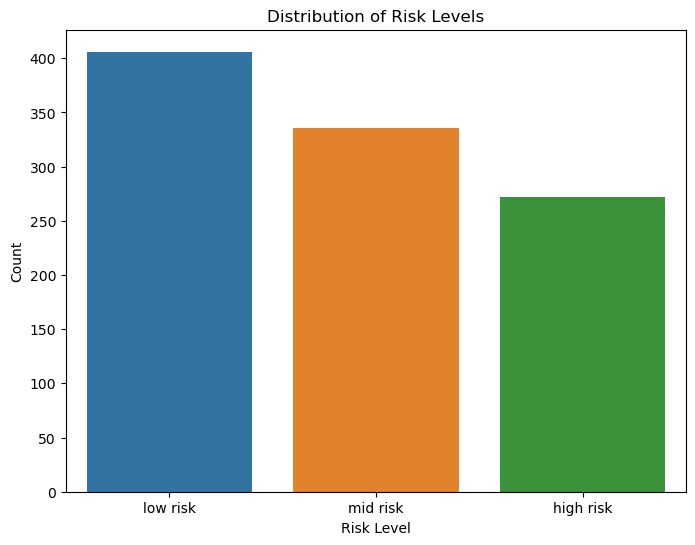

In [10]:
# Count plot for RiskLevel
plt.figure(figsize=(8,6))
sns.countplot(x='RiskLevel', data=data, order=data['RiskLevel'].value_counts().index)
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

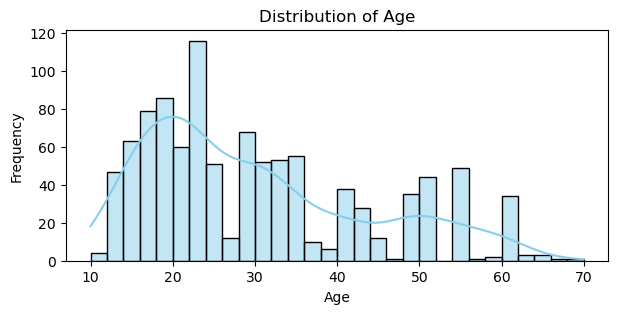

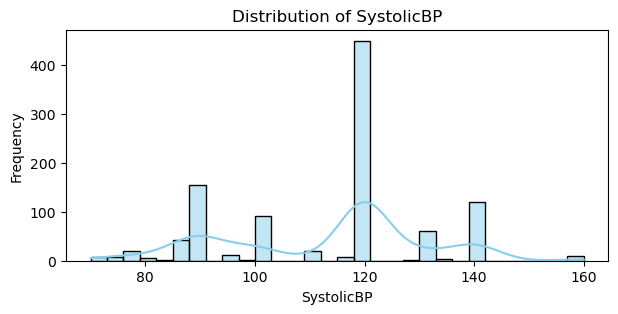

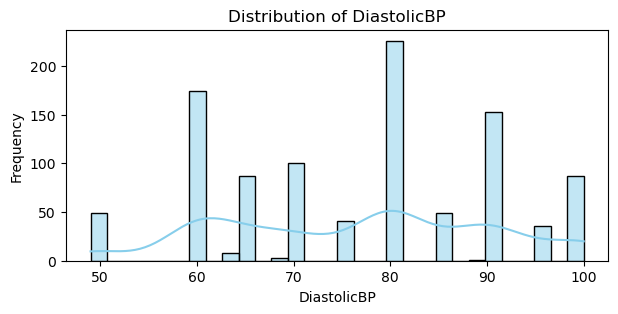

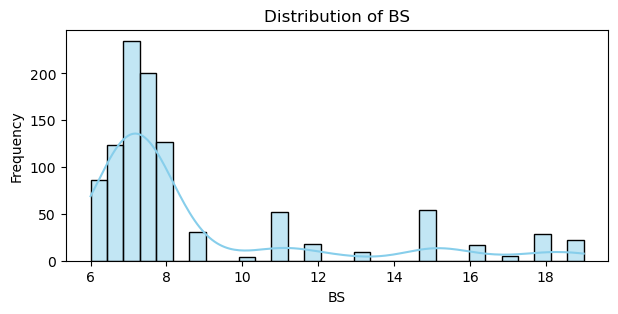

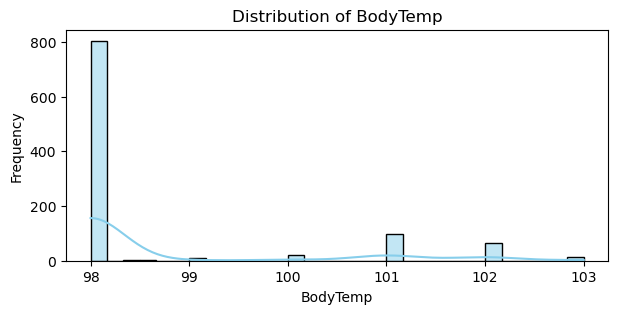

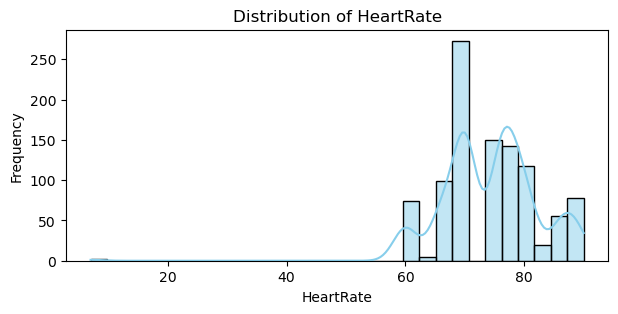

In [21]:
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plotting histograms and KDE plots
for feature in numerical_features:
    plt.figure(figsize=(7,3))
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

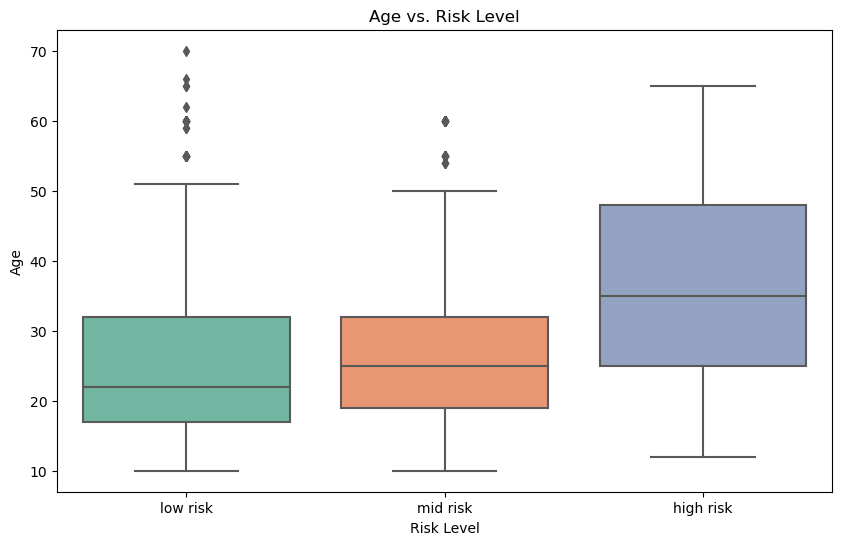

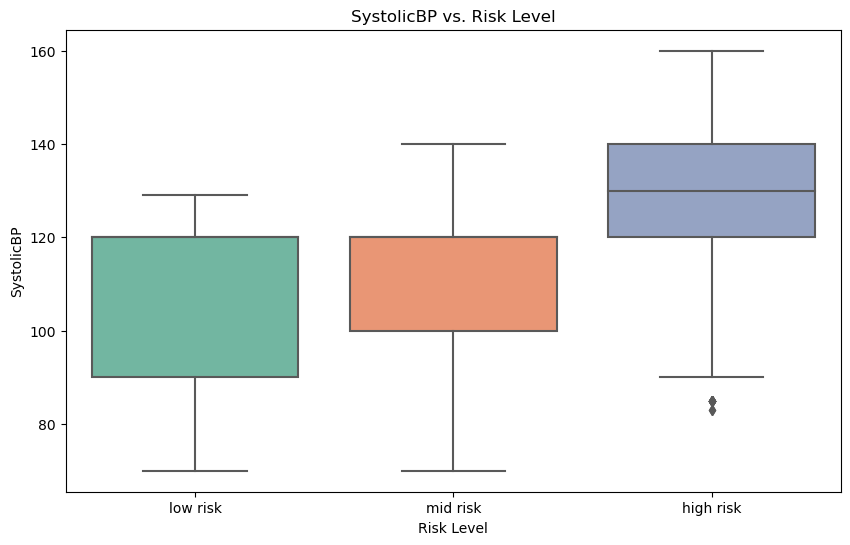

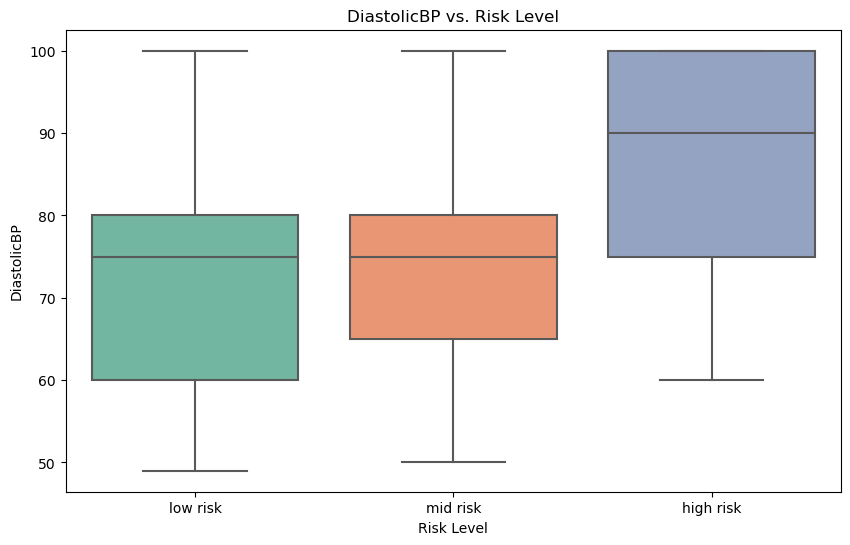

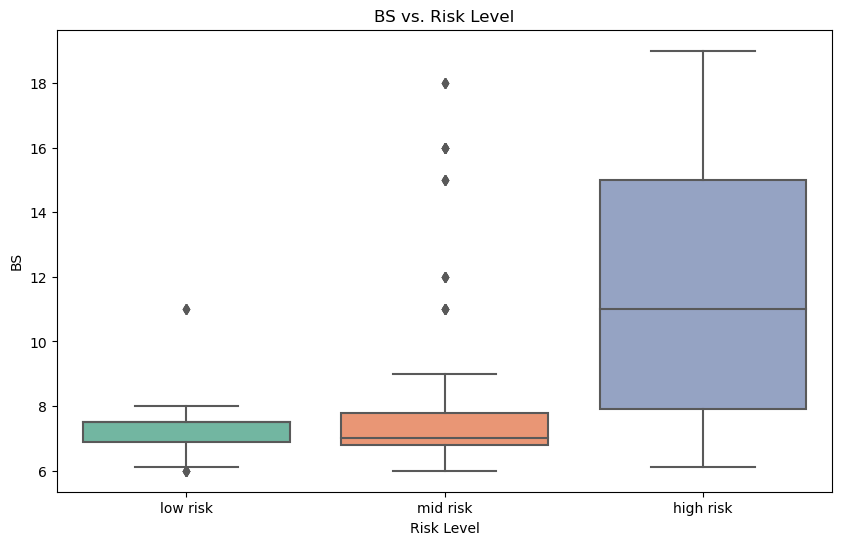

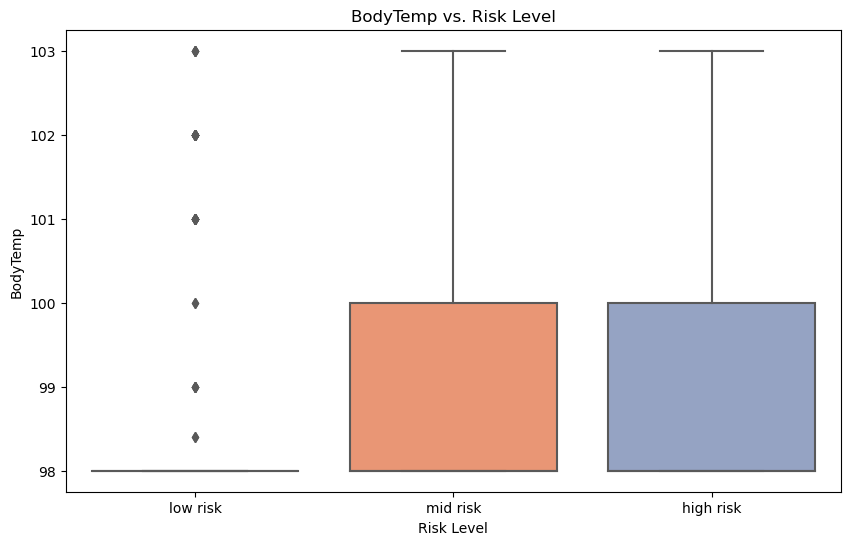

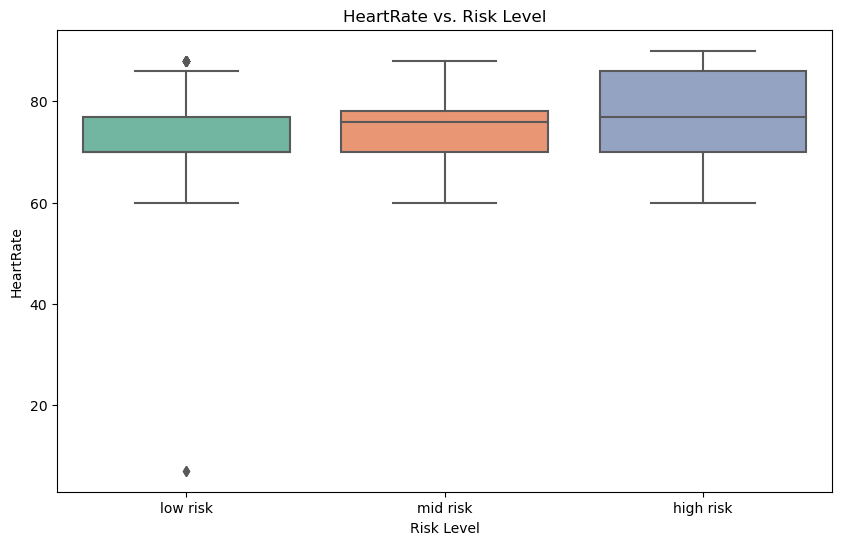

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='RiskLevel', y=feature, data=data, order=['low risk', 'mid risk', 'high risk'], palette='Set2')
    plt.title(f'{feature} vs. Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(feature)
    plt.show()

In [15]:
# Encode 'RiskLevel' to numerical values
label_encoder = LabelEncoder()
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

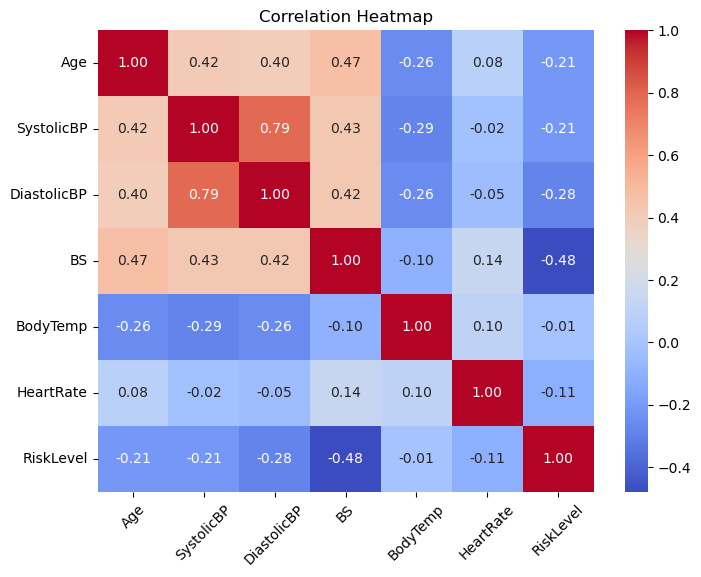

In [22]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [16]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


In [26]:
# Feature Scaling
scaler = StandardScaler()
features = data.drop('RiskLevel', axis=1)
scaled_features = scaler.fit_transform(features)

In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['RiskLevel'], test_size=0.2, random_state=42)


In [28]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


In [21]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [23]:
y_pred

array([2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 0])

In [30]:
label_encoder.classes_

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [32]:
# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8177339901477833
Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.87      0.87        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.82      0.82      0.82       203

